In [6]:
import pandas as pd

In [8]:
data = pd.read_csv('Housing.csv')

In [51]:
data.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


TypeError: list indices must be integers or slices, not tuple

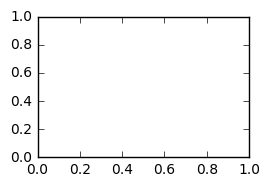

In [82]:
import matplotlib.pyplot as plt

plt.subplot(2, 2, 1)
x = data.lotsize
y = data.price
pos = [x,y]
plt.plot(pos[:,:])

plt.subplot(2, 2, 2)
x = data.bedrooms
y = data.price
plt.show()

In [52]:
X = data[["lotsize", "bedrooms", "bathrms", "stories"]]
y = data.price

print(X)
print(y)

     lotsize  bedrooms  bathrms  stories
0       5850         3        1        2
1       4000         2        1        1
2       3060         3        1        1
3       6650         3        1        2
4       6360         2        1        1
5       4160         3        1        1
6       3880         3        2        2
7       4160         3        1        3
8       4800         3        1        1
9       5500         3        2        4
10      7200         3        2        1
11      3000         2        1        1
12      1700         3        1        2
13      2880         3        1        1
14      3600         2        1        1
15      3185         2        1        1
16      3300         3        1        2
17      5200         4        1        3
18      3450         1        1        1
19      3986         2        2        1
20      4785         3        1        2
21      4510         4        2        2
22      4000         3        1        2
23      3934    

In [71]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
model.coef_

array([  5.42917370e+00,   2.82461379e+03,   1.71051745e+04,
         7.63489700e+03])

In [54]:
from IPython.display import HTML, display
import statsmodels.api as sm
from statsmodels.formula.api import ols

housing_model = ols("y ~ X", data=data).fit()
housing_model_summary = housing_model.summary()

HTML(
    housing_model_summary\
        .as_html()\
        .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;">  Adj. R-squared:    </th>')\
        .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')\
        .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')\
        .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')\
        .replace('<th>[95.0% Conf. Int.]</th>', '<th style="background-color:#ff9896;">[95.0% Conf. Int.]</th>')
)

(546,)
(546,)


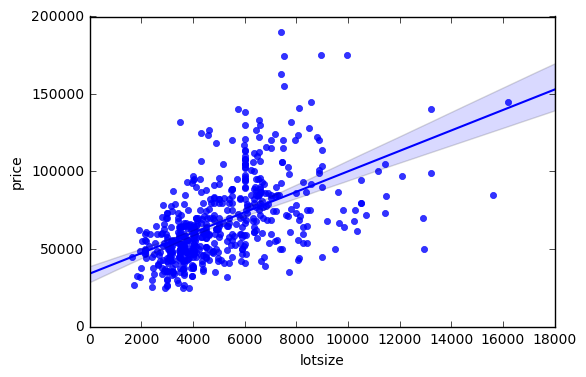

In [70]:
# # this produces our four regression plots for total_unemployed

# # plots the graphs inside the Jupyter/IPython Notebook
# %matplotlib inline
# # import seaborn as sns
# import matplotlib.pyplot as plt

# fig = plt.figure(figsize=(15,8))

# # pass in the model as the first parameter, then specify the 
# # predictor variable we want to analyze
# fig = sm.graphics.plot_regress_exog(housing_model, 'data.price', fig=fig)

import seaborn as sns

x = data.lotsize

print(x.shape)
print(y.shape)
sns.regplot(x,y)

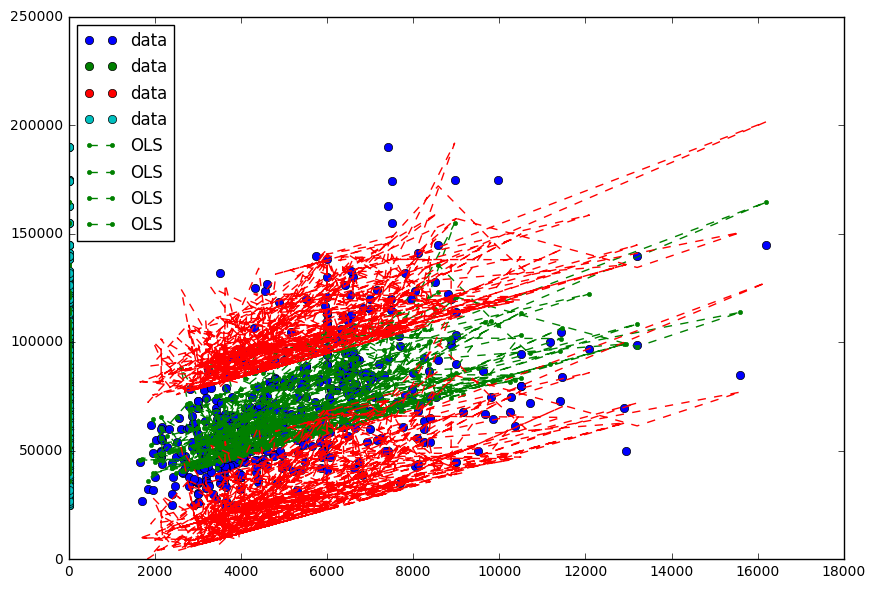

In [61]:
# this produces our trend line

from statsmodels.sandbox.regression.predstd import wls_prediction_std
import numpy as np

# # predictor variable
# x = df[['total_unemployed']]
# # dependent variable
# y = df[['housing_price_index']]

# retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(X, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(X, housing_model.fittedvalues, 'g--.', label="OLS")
# plot upper and lower ci values
ax.plot(X, confidence_interval_upper, 'r--')
ax.plot(X, confidence_interval_lower, 'r--')
# plot legend
ax.legend(loc='best');

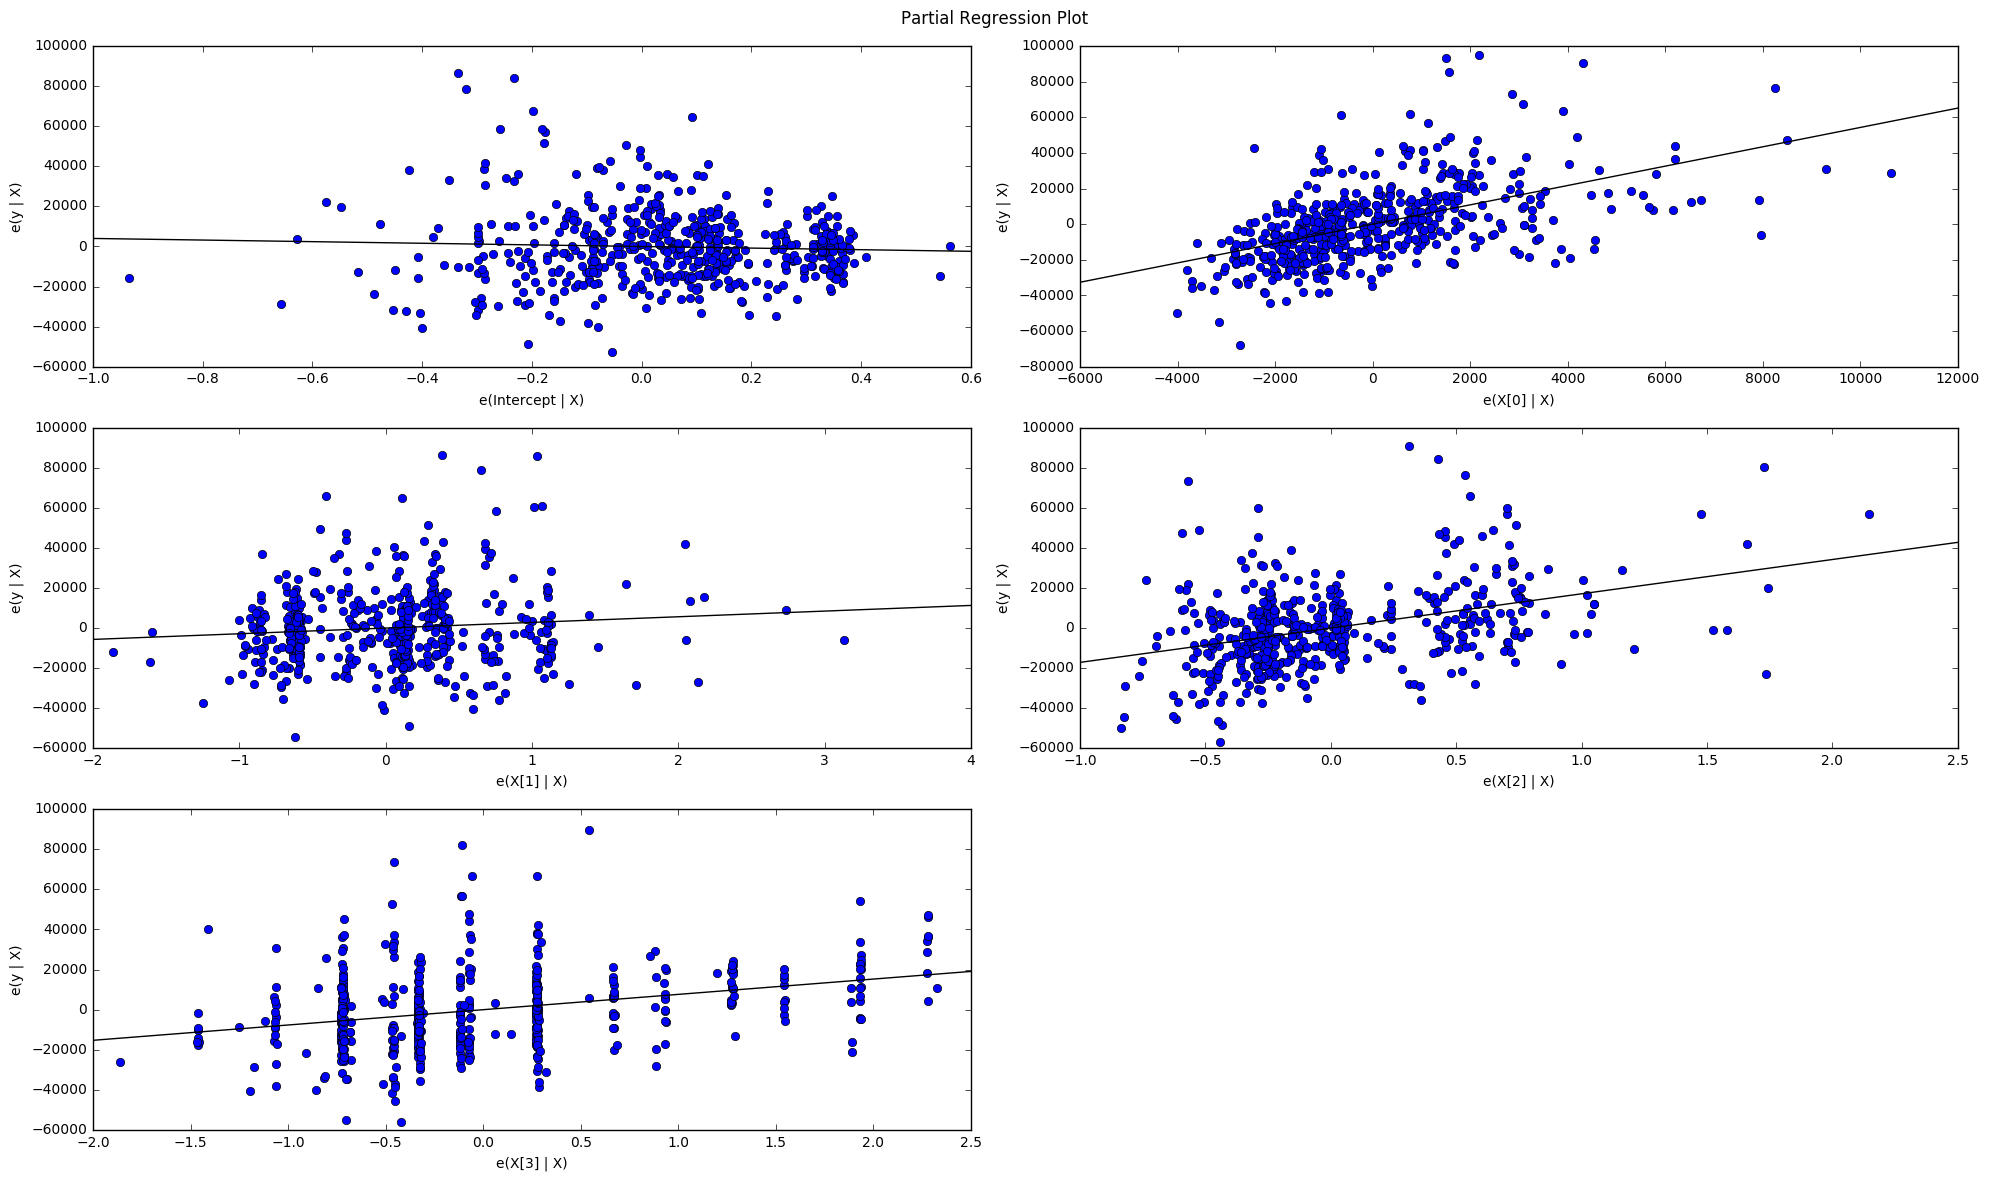

In [63]:
# this produces our six partial regression plots

fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(housing_model, fig=fig)

In [50]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(X_test.shape)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
accuracy = knn.score(X_test, y_test)

print(accuracy)

(327, 4)
(219, 4)
0.322123260746


In [39]:
from sklearn.linear_model import Ridge

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(X_test.shape)

ridge = Ridge()
ridge.fit(X_train, y_train)
accuracy = ridge.score(X_test, y_test)

print(accuracy)

(327, 4)
(219, 4)
0.322123260746


In [40]:
from sklearn.linear_model import Lasso

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(X_test.shape)

lasso = Lasso()
lasso.fit(X_train, y_train)
accuracy = lasso.score(X_test, y_test)

print(accuracy)

#best fit so far

(327, 4)
(219, 4)
0.514554749854


In [42]:
from sklearn.linear_model import ElasticNet

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(X_test.shape)

els = ElasticNet()
els.fit(X_train, y_train)
accuracy = els.score(X_test, y_test)

print(accuracy)

(327, 4)
(219, 4)
0.470453646975


In [43]:
from sklearn.linear_model import SGDRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)
print(X_train.shape)
print(X_test.shape)

sgr = SGDRegressor()
sgr.fit(X_train, y_train)
accuracy = sgr.score(X_test, y_test)

print(accuracy)

#worst fit

(327, 4)
(219, 4)
-7.23358716608e+23


C:\Users\OC\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
